In [4]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [5]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 99% 321M/325M [00:10<00:00, 25.7MB/s]
100% 325M/325M [00:10<00:00, 33.3MB/s]


In [7]:
%%capture
!unzip \*.zip && rm *.zip &> /dev/null

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import models
from tensorflow.keras import layers


In [9]:
test_dir = '/content/test'
training_dir = '/content/train'

In [10]:
training_benign_dir = os.path.join(training_dir,'benign')
training_malignant_dir = os.path.join(training_dir,'malignant')
test_benign_dir = os.path.join(test_dir,'benign')
test_malignant_dir = os.path.join(test_dir,'malignant')

In [11]:
print('Total training image for benign are :',len(os.listdir(training_benign_dir)))
print('Total training image for malignant are :',len(os.listdir(training_malignant_dir)))
print('Total test image for benign are :',len(os.listdir(test_benign_dir)))
print('Total test image for malignant are :',len(os.listdir(test_malignant_dir)))

Total training image for benign are : 1440
Total training image for malignant are : 1197
Total test image for benign are : 360
Total test image for malignant are : 300


In [12]:
training_benign_fnames = os.listdir(training_benign_dir)
print(training_benign_fnames[:10])

training_malignant_fnames = os.listdir(training_malignant_dir)
training_malignant_fnames.sort()
print(training_malignant_fnames[:10])

['980.jpg', '1585.jpg', '1726.jpg', '1095.jpg', '948.jpg', '1240.jpg', '39.jpg', '1084.jpg', '1178.jpg', '1156.jpg']
['10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1004.jpg', '1006.jpg', '1008.jpg', '101.jpg', '1010.jpg']


In [13]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

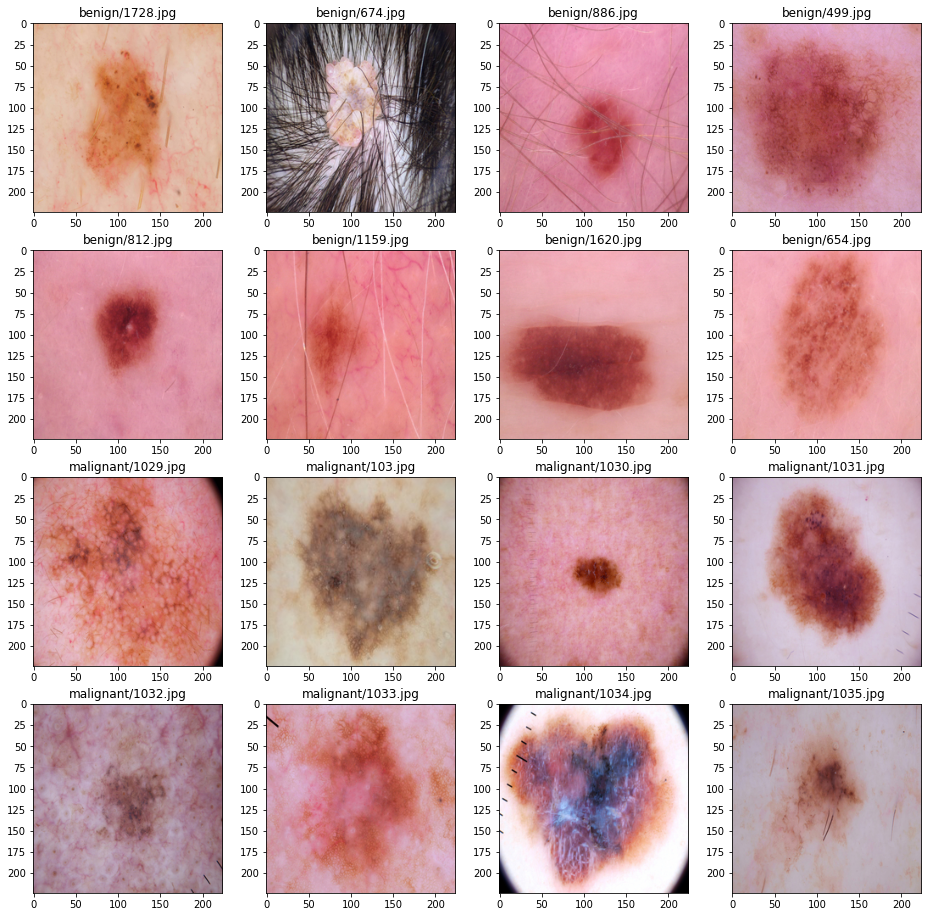

In [18]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_benign_pix = [os.path.join(training_benign_dir, fname) 
                for fname in training_benign_fnames[pic_index-8:pic_index]]
next_malignant_pix = [os.path.join(training_malignant_dir, fname) 
                for fname in training_malignant_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_benign_pix+next_malignant_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path[15:])

plt.show()


In [32]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
train_genrator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (224,224),
    batch_size = 20,
    class_mode = 'binary'

)

test_genrator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [39]:
model = models.Sequential()

In [40]:
model.add(layers.Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(512,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 512)      

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              metrics = ['acc'],
               loss=tf.keras.losses.BinaryCrossentropy())

In [52]:
trained_model = model.fit(
    train_genrator,
    validation_data= test_genrator,
    epochs = 60,
    steps_per_epoch=131,
    #validation_steps=33
    )

Epoch 1/60
131/131 [==============================] - 37s 281ms/step - loss: 0.3112 - acc: 0.8483 - val_loss: 0.3070 - val_acc: 0.8455
Epoch 2/60
131/131 [==============================] - 37s 279ms/step - loss: 0.2997 - acc: 0.8556 - val_loss: 0.3032 - val_acc: 0.8424
Epoch 3/60
131/131 [==============================] - 37s 279ms/step - loss: 0.2891 - acc: 0.8621 - val_loss: 0.3121 - val_acc: 0.8348
Epoch 4/60
131/131 [==============================] - 37s 283ms/step - loss: 0.2869 - acc: 0.8705 - val_loss: 0.2904 - val_acc: 0.8606
Epoch 5/60
131/131 [==============================] - 37s 283ms/step - loss: 0.3010 - acc: 0.8582 - val_loss: 0.3059 - val_acc: 0.8379
Epoch 6/60
131/131 [==============================] - 37s 283ms/step - loss: 0.2834 - acc: 0.8647 - val_loss: 0.2970 - val_acc: 0.8424
Epoch 7/60
131/131 [==============================] - 37s 282ms/step - loss: 0.3248 - acc: 0.8491 - val_loss: 0.3214 - val_acc: 0.8364
Epoch 8/60
131/131 [==============================] - 3

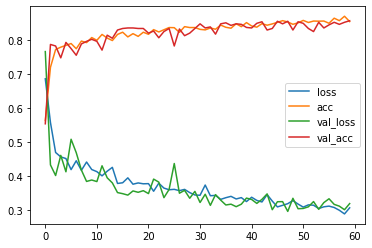

In [48]:
pd.DataFrame(trained_model.history).plot()

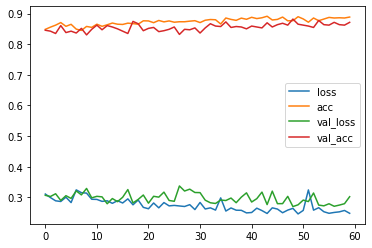

In [53]:
pd.DataFrame(trained_model.history).plot()

In [54]:
model.save('/content/87%_model.h5')

In [60]:
model.evaluate(test_genrator, steps=33)

33/33 [==============================] - 2s 57ms/step - loss: 0.3025 - acc: 0.8712


[0.302525132894516, 0.8712121248245239]